## Load datasets

In [19]:
from sklearn.datasets import load_svmlight_file

TRAIN_FILE = "/home/gab/projetos/machine-learning/sentiment-analysis/data/train.txt"
TEST_FILE = "/home/gab/projetos/machine-learning/sentiment-analysis/data/test.txt"

X_train, y_train = load_svmlight_file(TRAIN_FILE)
X_test, y_test = load_svmlight_file(TEST_FILE)

print(X_train.shape, y_train.shape)

(25000, 700) (25000,)


## Setup models

In [20]:
from sklearn.linear_model import LogisticRegression

# set up logistic regression model
lr = LogisticRegression(
    dual=False,
    tol=1e-6,
    max_iter=200,
    
    verbose=True,
    warm_start=False,
    n_jobs=5,

    penalty='l2',
    C=10.0,
    solver='newton-cholesky',
)

lr.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Newton iter=1
  Check Convergence
    1. max |gradient| 0.009100424964551743 <= 1e-06
Newton iter=2
  Check Convergence
    1. max |gradient| 0.0034615551041709963 <= 1e-06
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0010784333255266583 <= 1e-06
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00017315583619254387 <= 1e-06
Newton iter=5
  Check Convergence
    1. max |gradient| 5.303976115766093e-06 <= 1e-06
Newton iter=6
  Check Convergence
    1. max |gradient| 4.821945261915955e-09 <= 1e-06
    2. Newton decrement 4.7253614430500376e-08 <= 1e-06
  Solver did converge at loss = 0.3008573841441688.


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  2.1min finished


LogisticRegression(C=10.0, max_iter=200, n_jobs=5, solver='newton-cholesky',
                   tol=1e-06, verbose=True)

In [21]:
from sklearn.svm import LinearSVC

svm = LinearSVC(
    dual=False,
    tol=1e-6,
    max_iter=200,
    
    verbose=True,
    random_state=42,

    penalty='l2',
    C=10.0,
)

svm.fit(X_train, y_train)

[LibLinear]iter  1 act 1.212e+05 pre 1.134e+05 delta 1.997e+00 f 2.500e+05 |g| 2.316e+05 CG   7
cg reaches trust region boundary
iter  2 act 1.875e+04 pre 1.599e+04 delta 2.474e+00 f 1.288e+05 |g| 3.952e+04 CG   9
cg reaches trust region boundary
iter  3 act 7.714e+03 pre 6.758e+03 delta 3.012e+00 f 1.101e+05 |g| 2.030e+04 CG   9
cg reaches trust region boundary
iter  4 act 3.517e+03 pre 3.432e+03 delta 3.144e+00 f 1.023e+05 |g| 5.845e+03 CG  13
cg reaches trust region boundary
iter  5 act 1.555e+03 pre 1.502e+03 delta 3.269e+00 f 9.882e+04 |g| 2.823e+03 CG  28
cg reaches trust region boundary
iter  6 act 1.457e+02 pre 1.442e+02 delta 3.309e+00 f 9.726e+04 |g| 8.831e+02 CG  73
iter  7 act 8.100e+00 pre 8.075e+00 delta 3.309e+00 f 9.712e+04 |g| 3.552e+02 CG  34
iter  8 act 2.332e+00 pre 2.331e+00 delta 3.309e+00 f 9.711e+04 |g| 3.168e+01 CG  93
iter  9 act 2.295e-03 pre 2.295e-03 delta 3.309e+00 f 9.711e+04 |g| 5.265e+00 CG  37
iter 10 act 7.559e-05 pre 7.559e-05 delta 3.309e+00 f 9.711

LinearSVC(C=10.0, dual=False, max_iter=200, random_state=42, tol=1e-06,
          verbose=True)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(
    solver='svd',
    tol=1e-6,
)

lda.fit(X_train.toarray(), y_train)

LinearDiscriminantAnalysis(tol=1e-06)

In [25]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('svm', svm),
        ('lda', lda),
    ],
    voting='hard',
    n_jobs=5,
)

vc.fit(X_train.toarray(), y_train)

[LibLinear]Newton iter=1


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


  Check Convergence
    1. max |gradient| 0.009100424964552054 <= 1e-06
Newton iter=2
iter  1 act 1.212e+05 pre 1.134e+05 delta 1.997e+00 f 2.500e+05 |g| 2.316e+05 CG   7
  Check Convergence
    1. max |gradient| 0.0034615551041719986 <= 1e-06
Newton iter=3
cg reaches trust region boundary
  Check Convergence
    1. max |gradient| 0.0010784333255266542 <= 1e-06
Newton iter=4
iter  2 act 1.875e+04 pre 1.599e+04 delta 2.474e+00 f 1.288e+05 |g| 3.952e+04 CG   9
  Check Convergence
    1. max |gradient| 0.0001731558361923384 <= 1e-06
Newton iter=5
cg reaches trust region boundary
  Check Convergence
    1. max |gradient| 5.303976116033149e-06 <= 1e-06
Newton iter=6
iter  3 act 7.714e+03 pre 6.758e+03 delta 3.012e+00 f 1.101e+05 |g| 2.030e+04 CG   9
  Check Convergence
    1. max |gradient| 4.821945258880189e-09 <= 1e-06
    2. Newton decrement 4.725361442896054e-08 <= 1e-06
  Solver did converge at loss = 0.3008573841441688.


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    5.2s finished


cg reaches trust region boundary
iter  4 act 3.517e+03 pre 3.432e+03 delta 3.144e+00 f 1.023e+05 |g| 5.845e+03 CG  13
cg reaches trust region boundary
iter  5 act 1.555e+03 pre 1.502e+03 delta 3.269e+00 f 9.882e+04 |g| 2.823e+03 CG  28
cg reaches trust region boundary
iter  6 act 1.457e+02 pre 1.442e+02 delta 3.309e+00 f 9.726e+04 |g| 8.831e+02 CG  73
iter  7 act 8.100e+00 pre 8.075e+00 delta 3.309e+00 f 9.712e+04 |g| 3.552e+02 CG  34
iter  8 act 2.332e+00 pre 2.331e+00 delta 3.309e+00 f 9.711e+04 |g| 3.168e+01 CG  93
iter  9 act 2.295e-03 pre 2.295e-03 delta 3.309e+00 f 9.711e+04 |g| 5.265e+00 CG  37
iter 10 act 7.559e-05 pre 7.559e-05 delta 3.309e+00 f 9.711e+04 |g| 5.094e-01 CG  49


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10.0, max_iter=200, n_jobs=5,
                                                 solver='newton-cholesky',
                                                 tol=1e-06, verbose=True)),
                             ('svm',
                              LinearSVC(C=10.0, dual=False, max_iter=200,
                                        random_state=42, tol=1e-06,
                                        verbose=True)),
                             ('lda', LinearDiscriminantAnalysis(tol=1e-06))],
                 n_jobs=5)

## Test models

##### Logistic Regression #####
              precision    recall  f1-score   support

         0.0      0.859     0.850     0.855     12500
         1.0      0.852     0.861     0.856     12500

    accuracy                          0.855     25000
   macro avg      0.855     0.855     0.855     25000
weighted avg      0.855     0.855     0.855     25000

Accuracy: 0.855
Precision: 0.852
Recall: 0.861
F1: 0.856

##### Linear SVM #####
              precision    recall  f1-score   support

         0.0      0.858     0.847     0.853     12500
         1.0      0.849     0.860     0.854     12500

    accuracy                          0.853     25000
   macro avg      0.853     0.853     0.853     25000
weighted avg      0.853     0.853     0.853     25000

Accuracy: 0.853
Precision: 0.849
Recall: 0.860
F1: 0.854

##### LDA #####
              precision    recall  f1-score   support

         0.0      0.859     0.840     0.849     12500
         1.0      0.843     0.862     0.852     12

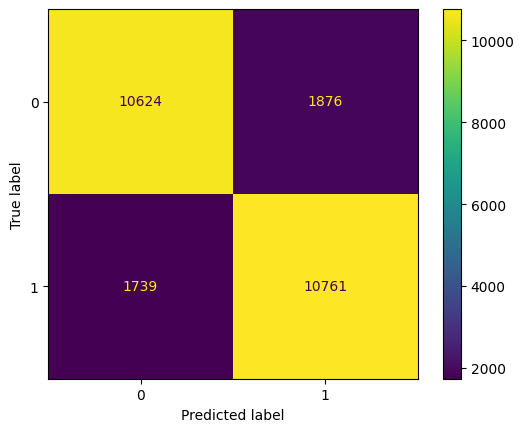

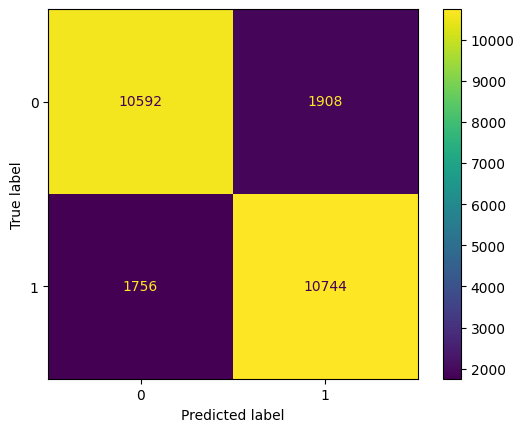

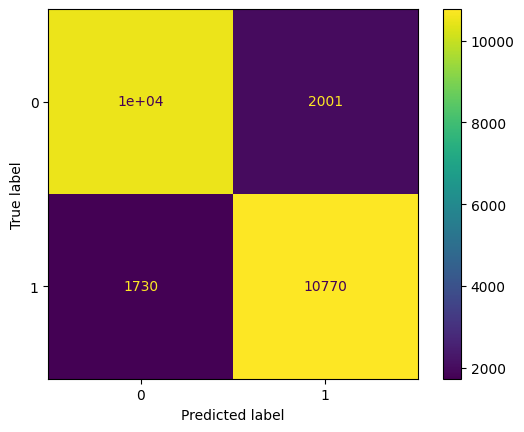

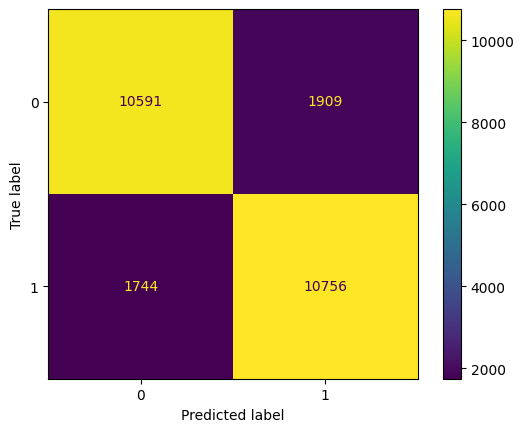

In [26]:
from sklearn import metrics

def display_results(y_test, y_pred):
    print(metrics.classification_report(y_test, y_pred, digits=3))

    cm = metrics.confusion_matrix(y_test, y_pred)
    metrics.ConfusionMatrixDisplay(cm).plot()

    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred):.3f}")
    print(f"F1: {metrics.f1_score(y_test, y_pred):.3f}")

lr_y_pred = lr.predict(X_test)
svm_y_pred = svm.predict(X_test)
lda_y_pred = lda.predict(X_test)
ensemble_y_pred = vc.predict(X_test)

print("##### Logistic Regression #####")
display_results(y_test, lr_y_pred)

print("\n##### Linear SVM #####")
display_results(y_test, svm_y_pred)

print("\n##### LDA #####")
display_results(y_test, lda_y_pred)

print("\n##### Ensemble #####")
display_results(y_test, ensemble_y_pred)